Farishadi Mufakkir Azizy

In [1]:
#Import Library
import pandas as pd
import numpy as np

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

Dataset 1

In [3]:
df = pd.read_csv("Data Set 1.csv")
df.head()

,date,new_tested,acc_tested,new_confirmed,acc_confirmed,acc_negative,being_checked,isolated
0,02-Mar-20,339,339,2,2,335,2,2
1,03-Mar-20,2,341,0,2,337,2,2
2,04-Mar-20,31,372,0,2,356,14,2
3,05-Mar-20,16,388,0,2,371,15,2
4,06-Mar-20,62,450,2,4,422,24,4


**Soal 1:** Dengan menggunakan line plot, tampilkan perbandingan jumlah akumulatif tes sampel, 
terkonfirmasi positif dan terkonfirmasi negatif untuk periode waktu yang tersedia.

In [4]:
df1 = df[["date", "acc_tested", "acc_confirmed", "acc_negative"]].copy()
df1.set_index('date', inplace=True)
df1.columns

Index(['acc_tested', 'acc_confirmed', 'acc_negative'], dtype='object')

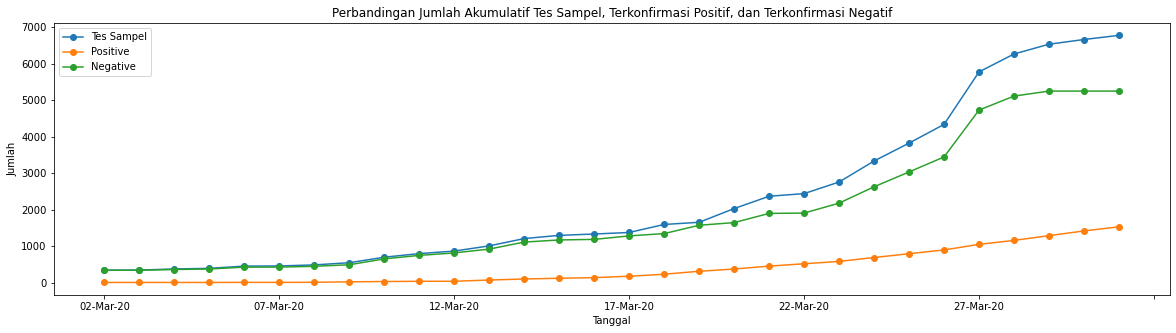

In [5]:
df1.rename(columns={'acc_tested':'Tes Sampel', 'acc_confirmed':'Positive', 'acc_negative':'Negative'}, inplace=True)

df1.plot(kind='line', figsize=(20, 5), marker='o')

plt.title('Perbandingan Jumlah Akumulatif Tes Sampel, Terkonfirmasi Positif, dan Terkonfirmasi Negatif')
plt.ylabel('Jumlah')
plt.xlabel('Tanggal')
plt.show()

**Soal 2:**  
- Hitunglah nilai positive rate dan negative rate untuk masing-masing waktu.

Positive	rate	= Jumlah	terkonfirmasi	positif
Jumlah	tes	sampel × 100%

Negative	rate	= Jumlah	terkonfirmasi	negatif
Jumlah	tes	sampel × 100%

- Dengan menggunakan bar plot, tampilkan perbandingan positivity rate dan 
negativity rate untuk periode waktu yang tersedia.
- Pada tanggal berapa nilai positive rate menunjukkan nilai tertinggi?
- Pada tanggal berapa nilai negative rate menunjukkan nilai tertinggi?

In [6]:
df2 = df[["date", "acc_tested", "acc_confirmed", "acc_negative"]].copy()
df2.rename(columns={'acc_tested':'Tes Sampel', 'acc_confirmed':'Positive', 'acc_negative':'Negative'}, inplace=True)

positif = []
negatif = []
for i in range(0, len(df2)):

    positif.append((df2['Positive'] / df2['Tes Sampel'] ) * 100)
    negatif.append(( df2['Negative'] / df2['Tes Sampel'] ) * 100)
    df2['Positive Rate'] = positif[i]
    df2['Negative Rate'] = negatif[i]

df2.head()

,date,Tes Sampel,Positive,Negative,Positive Rate,Negative Rate
0,02-Mar-20,339,2,335,0.589971,98.820059
1,03-Mar-20,341,2,337,0.586510,98.826979
2,04-Mar-20,372,2,356,0.537634,95.698925
3,05-Mar-20,388,2,371,0.515464,95.618557
4,06-Mar-20,450,4,422,0.888889,93.777778


In [7]:
df2.set_index('date', inplace=True)

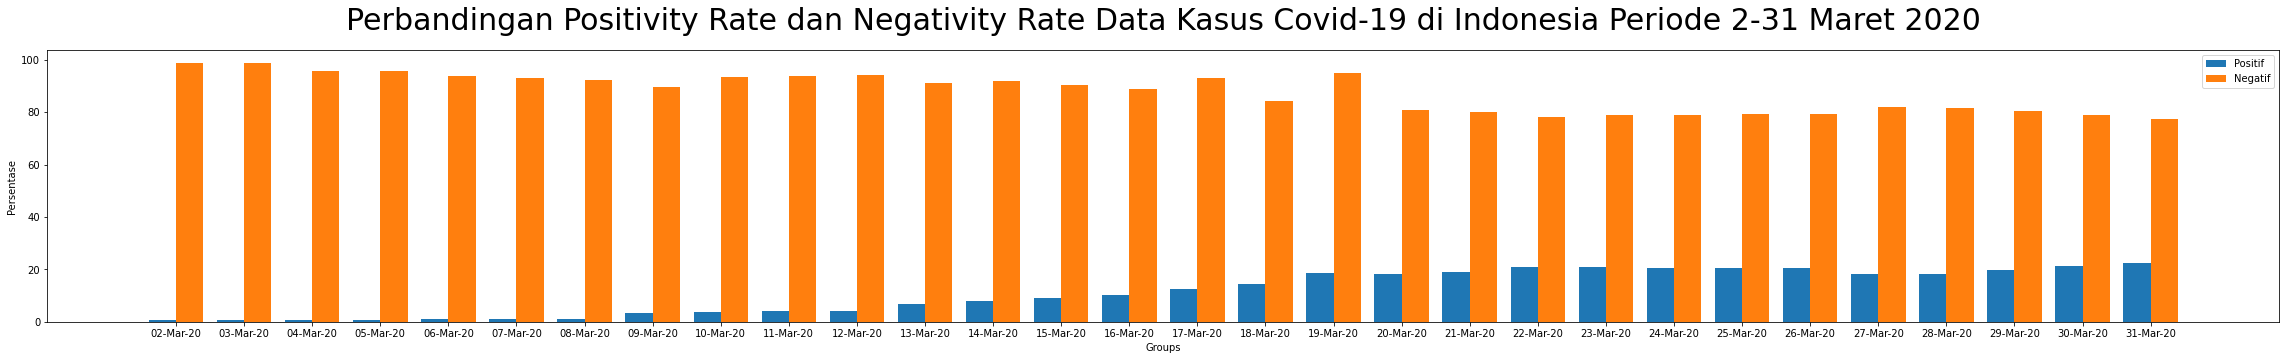

In [8]:
X = df2.index
X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, df2['Positive Rate'], 0.4, label = 'Positif')
plt.bar(X_axis + 0.2, df2['Negative Rate'], 0.4, label = 'Negatif')

plt.xticks(X_axis, X)
plt.xlabel("Groups")
plt.ylabel("Persentase")
plt.title("Perbandingan Positivity Rate dan Negativity Rate Data Kasus Covid-19 di Indonesia Periode 2-31 Maret 2020", 
          pad=20,
          fontsize=30)
plt.legend()
fig = plt.gcf()
fig.set_size_inches(40, 5)

plt.show()

In [9]:
daypos = df2['Positive Rate'].idxmax()
dayneg = df2['Negative Rate'].idxmax()
print("Positive Rate Tertinggi: ", daypos, " dengan persentase ", df2['Positive Rate'].max())
print("Negative Rate Tertinggi: ", dayneg, " dengan persentase ", df2['Negative Rate'].max())


Positive Rate Tertinggi:  31-Mar-20  dengan persentase  22.546849638483106
Negative Rate Tertinggi:  03-Mar-20  dengan persentase  98.82697947214076


**Soal 3:** Dengan menggunakan heatmap, tunjukkan korelasi antar variabel yang ada pada 
dataset.
- Tentukan variabel-variabel yang memiliki nilai korelasi paling positif, dan berikan 
penjelasan terkait nilai korelasi tersebut.
- Tentukan variabel-variabel yang memiliki nilai korelasi paling negatif, dan berikan 
penjelasan terkait nilai korelasi tersebut

Text(0.5, 1.0, 'Korelasi Data Kasus Covid-19 di Indonesia Periode 2-31 Maret 2020')

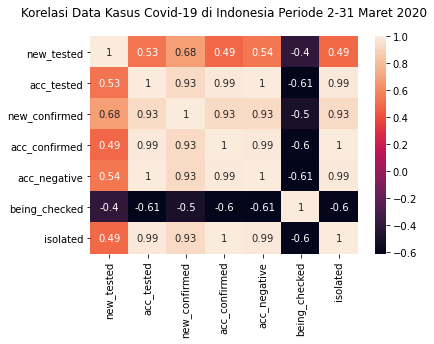

In [10]:
df3 = df

df3corr = df3.corr()
sns.heatmap(df3corr, annot=True)
plt.title("Korelasi Data Kasus Covid-19 di Indonesia Periode 2-31 Maret 2020", 
         pad=20)


**Nilai korelasi yang paling positif:**
- Kolom acc_tested & acc_negative memiliki nilai korelasi = 1

Banyak jumlah orang yang melakukan tes sampel (acc_tested) berbanding lurus dengan jumlah kasus yang terkonfirmasi negatif Covid-19 (acc_negative).

- Kolom acc_confirmed & isolated memiliki nilai korelasi = 1

Jika orang yang sudah melakukan tes sampel dan terkonfirmasi positif Covid-19 (acc_confirmed), maka orang tersebut perlu diisolasi (isolated). Maka kedua kolom tersebut berhubungan dengan korelasi positif.

**Nilai korelasi yang paling negatif:**
- Kolom being_checked & acc_tested memiliki nilai korelasi = -0.61 (paling kecil)

Nilai sampel yang sedang diperiksa (being_checked) berbanding terbalik dengan nilai sampel yang sudah diperiksa (acc_tested) pada hari tersebut dengan nilai hubungan -0.61. Karena jumlah sampel yang sedang diperiksa pada hari tersebut akan dipindahkan ke sampel yang sudah diperiksa. Jadi kedua nilai tersebut akan berbanding terbalik.

Dataset 2

In [11]:
data = pd.read_csv('Data Set 2.csv')
data.set_index('province_id', inplace=True)
data.head()

,province_name,island,iso_code,capital_city,population,population_kmsquare,confirmed,deceased,released,longitude,latitude
province_id,,,,,,,,,,,
1,Aceh,Sumatra,AC,Banda Aceh,4906835,86,4,0,0,9.672.895,3.869.994
2,Bali,Kepulauan Nusa Tenggara,BA,Denpasar,4104900,738,9,2,0,11.512.255,-825.731
3,Banten,Jawa,BT,Serang,11704877,1298,84,4,1,106.160.889,-6.315.299
4,Bengkulu,Sumatra,BE,Bengkulu,1844800,93,0,0,0,102.315.674,-3.414.725
5,DI Yogyakarta,Jawa,YO,Yogyakarta,3553100,1134,22,2,1,110.390.625,-7.863.382


**Soal 4:**
- Hitunglah nilai persentase perbandingan jumlah terkonfirmasi positif terhadap 
populasi per km2 untuk masing-masing provinsi.
- Dengan menggunakan bar plot, tampilkan perbandingan nilai persentase tersebut 
untuk masing-masing provinsi.
- Tampilkan 3 provinsi dengan nilai persentasi terbesar beserta nilai persentasenya.

In [12]:
data4 = data

percentage = []
negatif = []
for i in range(0, len(data)):

    percentage.append((data['confirmed'] / data['population_kmsquare'] ) * 100)
    data4['percentage_rate'] = percentage[i]

Text(0, 0.5, 'Persentase')

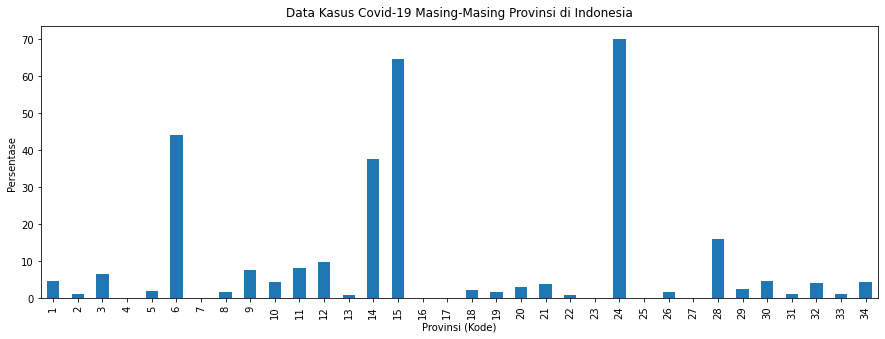

In [13]:
data4['percentage_rate'].plot(kind="bar", figsize=(15,5))
plt.title("Data Kasus Covid-19 Masing-Masing Provinsi di Indonesia", 
         pad=10)
plt.xlabel("Provinsi (Kode)")
plt.ylabel("Persentase")

In [14]:
data_percent = data4.sort_values(by=['percentage_rate'], ascending=False)
data_percent.head(3)

,province_name,island,iso_code,capital_city,population,population_kmsquare,confirmed,deceased,released,longitude,latitude,percentage_rate
province_id,,,,,,,,,,,,
24,Papua,Papua,PA,Jayapura,3091047,10,7,0,0,138.570.557,-3.579.213,70.000000
15,Kalimantan Timur,Kalimantan,KI,Samarinda,3351432,17,11,0,0,116.806.641,0.307616,64.705882
6,DKI Jakarta,Jawa,JK,Jakarta,10012271,1353,598,51,31,106.853.027,-6.162.401,44.198078


**Soal 5**
Dengan menggunakan pie chart, tampilkan persentase jumlah terkonfimasi positif untuk masing-masing pulau.

In [17]:
data_pulau = data.groupby('island', axis=0).sum()
data_pulau

,population,population_kmsquare,confirmed,deceased,released,percentage_rate
island,,,,,,
Jawa,143432781,6883,911,81,46,72.663077
Kalimantan,15048557,190,22,0,0,112.896559
Kepulauan Maluku,2796076,61,2,0,0,6.644880
Kepulauan Nusa Tenggara,13915592,1083,11,2,0,2.056332
Papua,3940856,12,7,0,0,70.000000
Sulawesi,18471854,631,35,1,0,23.875150
Sumatra,54412234,1257,29,2,0,21.065740


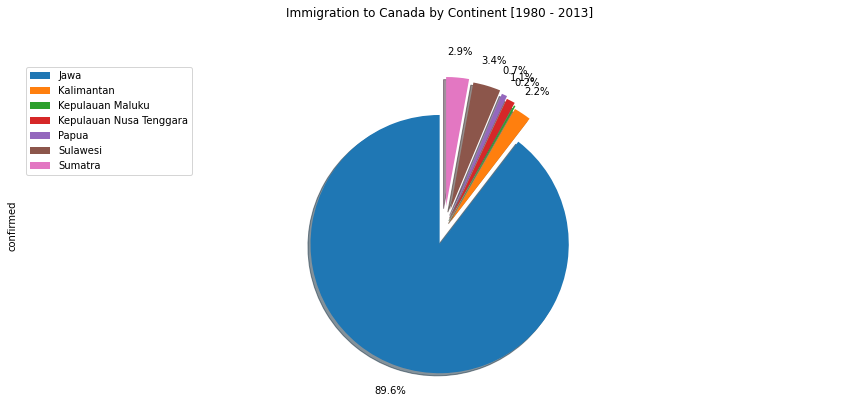

In [18]:
explode_list = [0.1, 0.1, 0.12 , 0.14, 0.16, 0.18, 0.2] # ratio for each continent with which to offset each wedge.

data_pulau['confirmed'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.2,    # the ratio between the center of each pie slice and the start of the text generated by autopct   # add custom colors
                            explode=explode_list # 'explode' lowest 3 continents
                            )

# scale the title up by 12% to match pctdistance
plt.title('Immigration to Canada by Continent [1980 - 2013]', y=1.12) 
#plt.figure.patch.set_facecolor('xkcd:mint green')
plt.axis('equal') 

# add legend
plt.legend(labels=data_pulau.index, loc='upper left') 

plt.show()